#### XYZ Company has offices in four different zones. The company wishes to investigate the following :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.shape

(29, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [6]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

#### 1. The mean sales generated by each zone.

In [7]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [8]:
data=df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()
data

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0.5, 1.0, 'Mean sales ')

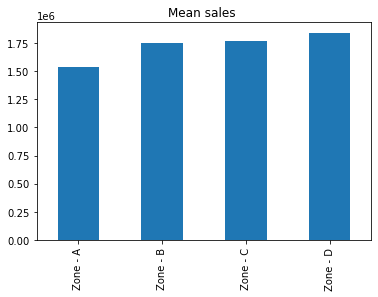

In [9]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].mean().plot(kind ='bar')
plt.title("Mean sales ")

It can be seen that Mean for zone-D is higher in comparing all the other three. For zone B and C there is only slight difference in mean.

#### 2. Total sales generated by all the zones for each month.

In [11]:
datas=df.copy()
datas["Total_sales"]=datas["Zone - A"]+datas["Zone - B"]+datas["Zone - C"]+datas["Zone - D"]
datas[["Month","Total_sales"]]

,Month,Total_sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


Text(0.5, 1.0, 'Total sales per month')

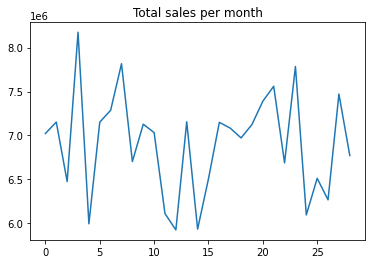

In [14]:
df['Total'] = df['Zone - A'] + df['Zone - B']+ df['Zone - C']+ df['Zone - D']
df['Total'].plot()
plt.title("Total sales per month")

In [16]:
df['Total_Sales']=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328,5995328


#### 3. Check whether all the zones generate the same amount of sales.

Text(0.5, 1.0, 'Sales Distribution \n')

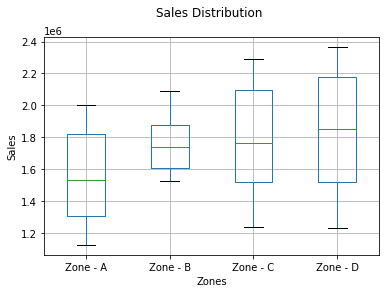

In [23]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].boxplot()
plt.xlabel("Zones")
plt.ylabel("Sales")
plt.title("Sales Distribution \n")

All zones are independant of each others,so that we can perfrom ANOVA test

Setting Hypothesis

H0: All zones generates the same amount of sales

H1: All zones generate different amount of sales

In [27]:
import scipy.stats as stats
los=0.05
a=np.array(df["Zone - A"])
b=np.array(df["Zone - B"])
c=np.array(df["Zone - C"])
d=np.array(df["Zone - D"])

fvalue,pvalue=stats.f_oneway(a,b,c,d)
print("Fvalue = ",str(fvalue))
print("Pvalue = ",str(pvalue))
if pvalue<los:
    print("Reject null hypothesis")
else:
    print("Faile to reject the null hypothesis")

Fvalue =  5.672056106843581
Pvalue =  0.0011827601694503335
Reject null hypothesis


Hence, all zones generate different amount of sales

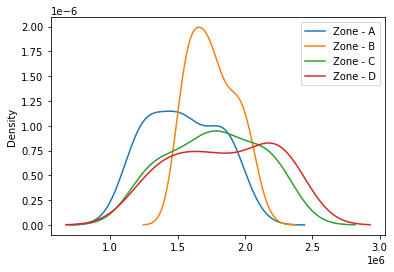

In [29]:
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].plot(kind ='kde')
plt.show()

As per data, the sales for each zone has different distribution.As per the Anova test on the data we concluded that mean sales for all zones are not same. 